In [1]:
import os 
import re
import random
import numpy as np
import pandas as pd 
import seaborn as sns
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
base_path = os.curdir + "\\dataset-resized"

# Creating a dictionary of the 4 classes
categories={}
i=0
for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        categories[i] = dirname.split('\\')[-1]
        break
#         print(os.path.join(dirname, filename))
    i += 1
print(categories)
print('defining constants successful!')

{1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic'}
defining constants successful!


In [3]:
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '\\' + x)
    return df

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + "\\" + categories[category])
    filenames_list = filenames_list  + filenames
    categories_list = categories_list + [category] * len(filenames)
   
df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})
print(df.head(100))
df = add_class_name_prefix(df, 'filename')

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

print('number of elements = ' , len(df))

        filename  category
0     glass0.jpg         1
1     glass1.jpg         1
2    glass10.jpg         1
3   glass100.jpg         1
4   glass101.jpg         1
..           ...       ...
95  glass184.jpg         1
96  glass185.jpg         1
97  glass186.jpg         1
98  glass187.jpg         1
99  glass188.jpg         1

[100 rows x 2 columns]
number of elements =  4000


In [4]:
df.head(10)

,filename,category
0,glass\glass595.jpg,1
1,glass\glass159.jpg,1
2,glass\glass882.jpg,1
3,metal\metal567.jpg,2
4,glass\glass175.jpg,1
5,glass\glass773.jpg,1
6,plastic\plastic356.jpg,4
7,metal\metal297.jpg,2
8,paper\paper395.jpg,3
9,plastic\plastic560.jpg,4


glass


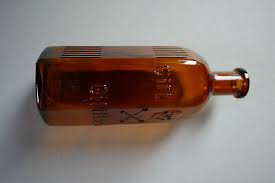

In [5]:
# see sample image, you can run the same cell again to get a different image
random_row = random.randint(0, len(df)-1)
sample = df.iloc[random_row]
randomimage = tf.keras.utils.load_img(base_path +"\\"+sample['filename'])
sample_category=sample["category"]

print(categories[sample_category])
randomimage

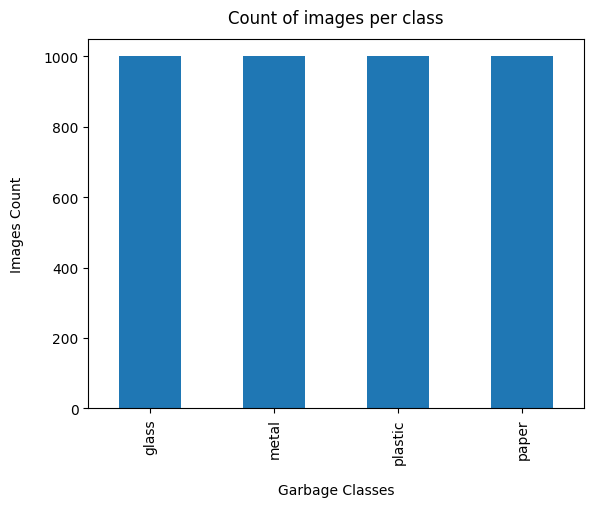

In [6]:
df_visualization = df.copy()
# Change the catgegories from numbers to names
df_visualization['category'] = df_visualization['category'].apply(lambda x:categories[x] )

df_visualization['category'].value_counts().plot.bar(x = 'count', y = 'category' )

plt.xlabel("Garbage Classes", labelpad=14)
plt.ylabel("Images Count", labelpad=14)
plt.title("Count of images per class", y=1.02);

In [7]:
df["category"] = df["category"].replace(categories) 

# We first split the data into two sets and then split the validate_df to two sets
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)
validate_df, test_df = train_test_split(validate_df, test_size=0.3, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

print('train size = ', total_train , 'validate size = ', total_validate, 'test size = ', test_df.shape[0])

train size =  3200 validate size =  560 test size =  240


In [8]:
train_df

,filename,category
0,paper\paper416.jpg,paper
1,plastic\plastic821.jpg,plastic
2,paper\paper4.jpg,paper
3,metal\metal84.jpg,metal
4,metal\metal695.jpg,metal
...,...,...
3195,metal\metal851.jpg,metal
3196,glass\glass145.jpg,glass
3197,glass\glass641.jpg,glass
3198,plastic\plastic456.jpg,plastic


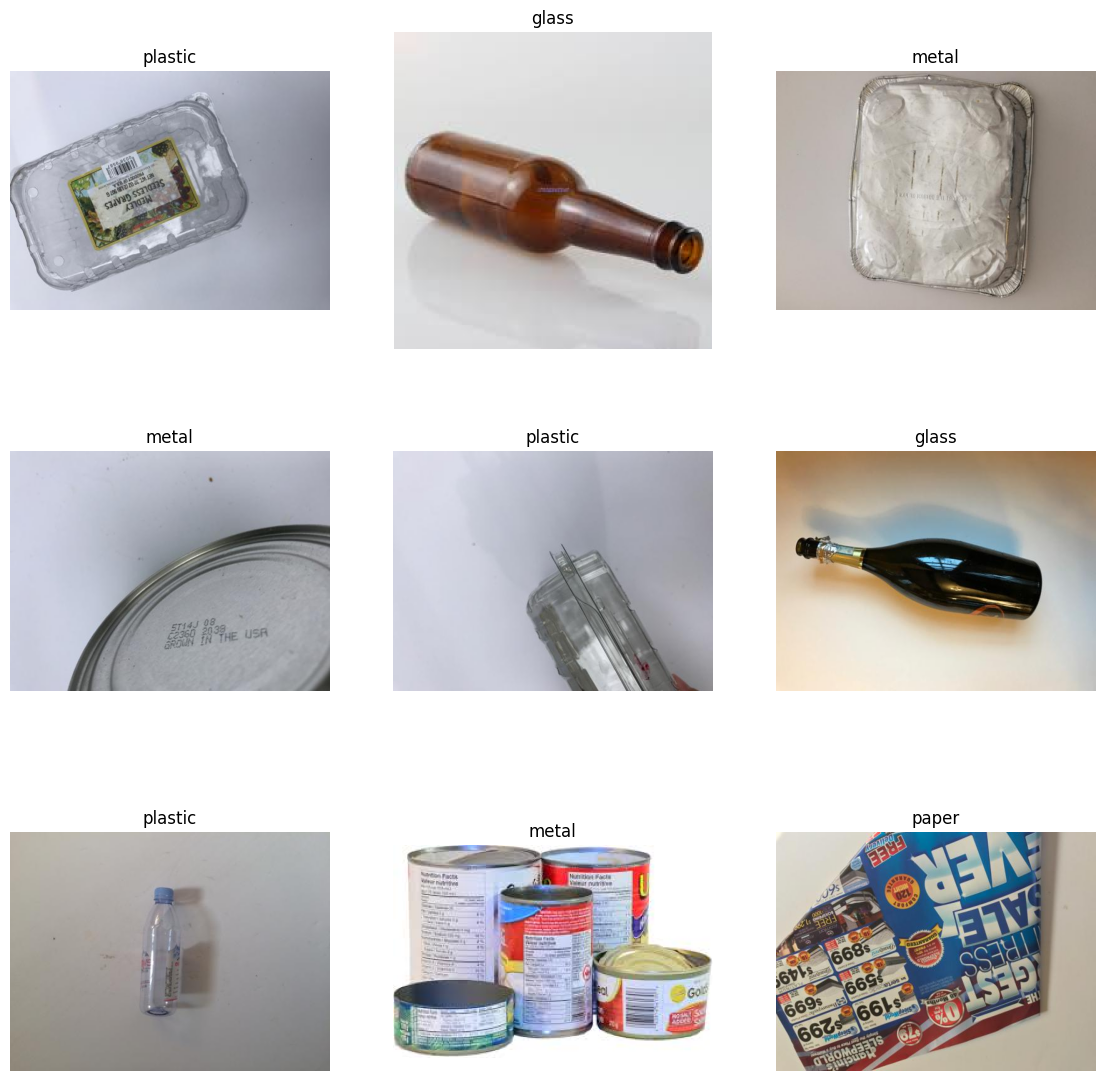

In [10]:
plt.figure(figsize=(14,14))
for i in range(9):
    random_row = random.randint(0, len(df)-1)
    sample = df.iloc[random_row]
    random_image = tf.keras.utils.load_img(base_path + "\\" + sample['filename'])
    plt.subplot(330 + 1 + i)
    plt.title(sample['category'])
    plt.imshow(random_image)
    plt.axis("off")

plt.show()